# Багатошаровий персептрон

In [ ]:
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

In [ ]:
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


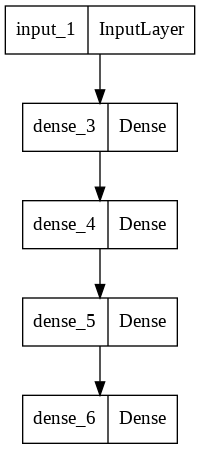

In [ ]:
plot_model(model)

## Задача класифікації одягу на датасеті Fashion MNIST.

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import keras.models as M
import keras.layers as L
import keras.backend as K
print("Keras", keras.__version__)

Keras 2.9.0


In [ ]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_val_oh = tf.keras.utils.to_categorical(y_val, 10)

In [ ]:
K.clear_session()
model = M.Sequential()
model.add(L.Dense(28*28, activation='elu'))
model.add(L.Dense(128, activation='elu'))
model.add(L.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy', # мінімізуємо перехресну ентропію
    optimizer='adam', # adaptive moment estimation
    metrics=['accuracy'] # виводимо відсоток правильних відповідей
)

Центруємо і нормуємо вхідні дані, так, щоб значення змінювалися
від -0.5 до +0.5.

In [ ]:
x_train_float = x_train.astype(float) / 255 - 0.5
x_val_float = x_val.astype(float) / 255 - 0.5

In [ ]:
results = model.fit(
    x_train_float.reshape(-1, 28*28),
    y_train_oh,
    batch_size=64,
    epochs=20,
    validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh)
)

Epoch 1/20
938/938 [==============================] - 11s 12ms/step - loss: 0.4874 - accuracy: 0.8227 - val_loss: 0.4367 - val_accuracy: 0.8410
Epoch 2/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3781 - accuracy: 0.8606 - val_loss: 0.4238 - val_accuracy: 0.8468
Epoch 3/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3401 - accuracy: 0.8742 - val_loss: 0.4077 - val_accuracy: 0.8610
Epoch 4/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3148 - accuracy: 0.8828 - val_loss: 0.3658 - val_accuracy: 0.8703
Epoch 5/20
938/938 [==============================] - 10s 11ms/step - loss: 0.2968 - accuracy: 0.8891 - val_loss: 0.3571 - val_accuracy: 0.8740
Epoch 6/20
938/938 [==============================] - 10s 11ms/step - loss: 0.2822 - accuracy: 0.8946 - val_loss: 0.3653 - val_accuracy: 0.8678
Epoch 7/20
938/938 [==============================] - 10s 11ms/step - loss: 0.2652 - accuracy: 0.9001 - val_loss: 0.3543 - val_accuracy:

Збільшивши кількість епох до 20, `val_accuracy` (точність на валідаційних даних) збільшилася незначно в порівнянні з прикладом (89.15% замість 88.57%). Можна було спробувати змінити інші гіперпараметри.